# A (Very) Basic Introduction to Graph Learning

2021-01-XX

Giovanni d'Ario

In [4]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from networkx.utils import pairwise

def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)
    
def multilayered_graph(*subset_sizes):
    extents = pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G

# Contents

- Basic definitions
- PUT HERE AN INTRO TO THE BASIC IDEAS OF MESSAGE PASSING
- Bronstein’s “Deep Learning on Graphs: successes, challenges etc”
- Bronstein’s Expressive power of GNNs

# Basic Definitions

Formally a graph is defined by a set of nodes $\mathcal{V}$ and a set of edges $\mathcal{E}$ between these nodes. Given two nodes $u, v \in \mathcal{V}$ we denote the dge gong from node $u \in \mathcal{V}$ to node $v \in \mathcal{V}$ as $(u, v) \in \mathcal{E}$.

A first basic distinction is between *undirected* and *directed* graphs.


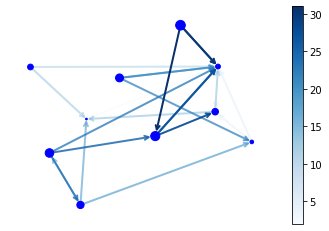

In [6]:
import matplotlib as mpl

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)
ax = plt.gca()
ax.set_axis_off()

A *simple graph* is a graph where:

1. There is at most one edge between each pair of nodes
2. No edge between a node and itself (self-loops)
3. All edges are *undirected*

![simple and non-simple graphs](fig/simplegraph.gif)

- Examples of graphs
    - Zachary’s Karate club
    - Twitter, the internet etc.
    - recommender systems
    - molecular pathways
    - chemical structures
- Definition of graphs: nodes, edges, directed vs undirected. Simple vs non-simple.
- Adjacency matrix for
    - Undirected matrices (symmetric)
    - Directed matrices (non symmetric)
    - Weighted edges

# Multi-Relational Graphs

Multi-relational graphs 
- Graphs with different types of edges
- Example: drug-drug interaction. Different edges correspond to different side effects

![Example of multi-relational graph](fig/decagon.png)
- One adjacency matrix per edge type -> adjacency tensor

# Multi-Relational Graphs: Special Cases

## Heterogeneous Graphs

- Nodes can also have *types*
- Nodes can be partitioned into disjoint sets $\mathcal{V_1},\mathcal{V_2}, \ldots, \mathcal{V_k}$
- $\mathcal{V} = \mathcal{V_1} \cup \mathcal{V_2} \cup \ldots \cup \mathcal{V_k}$
- $\mathcal{V_i} \cap \mathcal{V_j} = \emptyset,\quad \forall i \neq j$
- Possible constraints: nodes of one type interact with nodes of other types
- Example: molecules targeting proteins

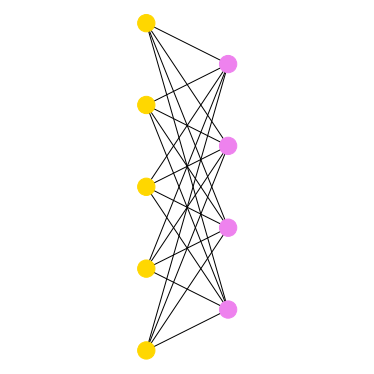

In [5]:
hide_code_in_slideshow()
subset_sizes = [5, 4]
subset_color = ["gold", "violet"]
G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()

# Multi-Relational Graphs: Special Cases

- a) Multilayer network: each layer contains its own network
- b) Multiplex netork are a special case of multilayer network, where nodes represent the same entities in each layer

![](fig/multilayerplex.png)

## Machine Learning on Graphs

### Node Classification

An example of node classification is predicting whether a user on a social network is a bot or not. We can build a graph with the nodes indicating the users and the edges indicating their connection. We can associate features to either/or the nodes and the edges. It may seem that node classification is just a straightforward variant of supervised classification. However graph data are not *independently and identically distributed (i.i.d)*. This is not true for nodes in a graph, and in fact some of the most successful node classification approaches explicitly leverage the connections between nodes. Examples are *homophily* where neighbors tend to share the same features, or *heterophily* where nodes of a type tend to create connections with nodes of a different type.

## Relation prediction

## Clustering and community detection

## Graph classification, regression and clustering